In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import ast
import tweepy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy

In [2]:
df = pd.read_csv("final_test_data.csv").drop("Unnamed: 0", axis = 1)

/Users/trevorcarpenter/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_mod = pd.DataFrame(df["Place"])
df_mod.insert(0, "Id", df["Id"].convert_dtypes(convert_floating = False))

In [4]:
na_df = df_mod.dropna()
coordinates = []
named_locations = []
for place_str in na_df["Place"]:
    m = re.search("(?<=coordinates\=)\[\[\[.*\]\]\]", place_str)
    coords = m.group(0)
    coordinates.append(ast.literal_eval(coords))
    pattern = re.compile("(?<=full_name\=').*, country_code")
    search_result = pattern.search(place_str)
    if search_result != None:
        string = search_result.group(0)
        named_location = string[:len(string)-15]
        named_locations.append(named_location)
    else:
        named_locations.append("")
na_df.insert(2, "Coordinates", coordinates)
na_df.insert(3, "Location Name", named_locations)
na_df.insert(4, "Old Index", na_df.index)
na_df.index = pd.RangeIndex(stop = len(na_df))

In [5]:
longitudes = []# first value
latitudes = [] # second value
for coord in na_df['Coordinates']:
    values = np.mean(coord[0], axis = 0)
    longitudes.append(values[0])
    latitudes.append(values[1])
na_df.insert(4, "Longitude", longitudes)
na_df.insert(4, "Latitude", latitudes)

In [6]:
na_df

,Id,Place,Coordinates,Location Name,Latitude,Longitude,Old Index
0,1353978816926986240,Place(_api=<tweepy.api.API object at 0x7ff3dd9...,"[[[-90.4181075, 41.696088], [-82.122971, 41.69...","Michigan, USA",45.001180,-86.270539,900
1,1353966554224844800,Place(_api=<tweepy.api.API object at 0x7ff3dd9...,"[[[-124.482003, 32.528832], [-114.131212, 32.5...","California, USA",37.269176,-119.306608,2303
2,1353966114368319488,Place(_api=<tweepy.api.API object at 0x7ff3dd9...,"[[[-84.19397, 35.831436], [-83.733713, 35.8314...","Knoxville, TN",35.982470,-83.963842,2360
3,1353963260404404224,Place(_api=<tweepy.api.API object at 0x7ff3dd9...,"[[[-121.3461003, 38.591142], [-121.291344, 38....","Carmichael, CA",38.641305,-121.318722,2743
4,1353960362970816512,Place(_api=<tweepy.api.API object at 0x7ff3dd9...,"[[[-122.436232, 47.4953154], [-122.2249728, 47...","Seattle, WA",47.614817,-122.330602,3159
...,...,...,...,...,...,...,...
1117,1352734067477913600,Place(_api=<tweepy.api.API object at 0x7fba1c2...,"[[[-84.8203089, 38.403186], [-80.518626, 38.40...","Ohio, USA",40.365160,-82.669467,437160
1118,1352731856567844864,Place(_api=<tweepy.api.API object at 0x7fba1c2...,"[[[-93.329515, 44.889964], [-93.194578, 44.889...","Minneapolis, MN",44.970610,-93.262046,438296
1119,1352728484842450944,Place(_api=<tweepy.api.API object at 0x7fba1c2...,"[[[-82.7535345, 39.971433], [-82.63926, 39.971...","Pataskala, OH",39.994163,-82.696397,440140
1120,1352728223310868480,Place(_api=<tweepy.api.API object at 0x7fba1c2...,"[[[-83.353955, 32.04683], [-78.499301, 32.0468...","South Carolina, USA",33.631140,-80.926628,440284


/Users/trevorcarpenter/opt/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:385: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


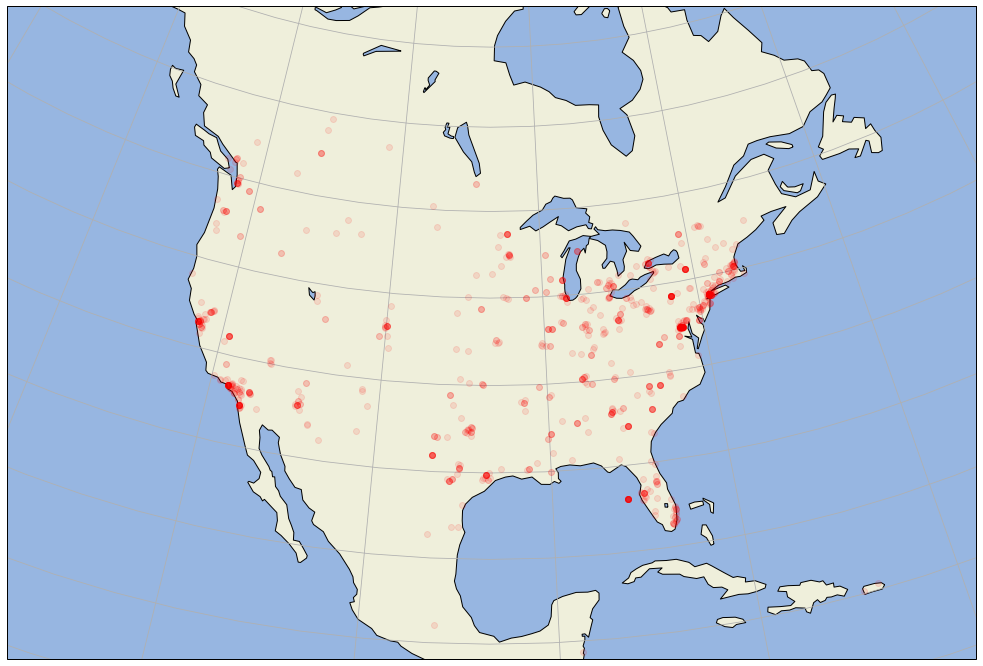

In [11]:
central_lat = 37.5
central_lon = -96
extent = [-130, -60, 14, 59.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(24, 12))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)
ax.plot(na_df["Longitude"], na_df["Latitude"], 'ro', alpha = 0.1, transform=ccrs.Geodetic(), )

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.gridlines()

In [20]:
import datetime
date_time_str = df['Time'][0]
date_time_str

'2021-01-26 08:45:59'

In [22]:
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')

In [23]:
date_time_obj

datetime.datetime(2021, 1, 26, 8, 45, 59)

In [29]:
times = []
for t in df['Time']:
    try:
        times.append(datetime.datetime.strptime(t, '%Y-%m-%d %H:%M:%S'))
    except:
        print("oops")
times

oops
oops
oops
oops
oops
oops
oops
oops


[datetime.datetime(2021, 1, 26, 8, 45, 59),
 datetime.datetime(2021, 1, 26, 8, 45, 59),
 datetime.datetime(2021, 1, 26, 8, 45, 55),
 datetime.datetime(2021, 1, 26, 8, 45, 47),
 datetime.datetime(2021, 1, 26, 8, 45, 45),
 datetime.datetime(2021, 1, 26, 8, 45, 42),
 datetime.datetime(2021, 1, 26, 8, 45, 41),
 datetime.datetime(2021, 1, 26, 8, 45, 31),
 datetime.datetime(2021, 1, 26, 8, 45, 30),
 datetime.datetime(2021, 1, 26, 8, 45, 29),
 datetime.datetime(2021, 1, 26, 8, 45, 29),
 datetime.datetime(2021, 1, 26, 8, 45, 28),
 datetime.datetime(2021, 1, 26, 8, 45, 27),
 datetime.datetime(2021, 1, 26, 8, 45, 25),
 datetime.datetime(2021, 1, 26, 8, 45, 20),
 datetime.datetime(2021, 1, 26, 8, 45, 19),
 datetime.datetime(2021, 1, 26, 8, 45, 18),
 datetime.datetime(2021, 1, 26, 8, 45, 15),
 datetime.datetime(2021, 1, 26, 8, 45, 9),
 datetime.datetime(2021, 1, 26, 8, 45, 8),
 datetime.datetime(2021, 1, 26, 8, 45, 6),
 datetime.datetime(2021, 1, 26, 8, 45, 5),
 datetime.datetime(2021, 1, 26, 8, 4

(array([ 70352.,  43230.,  37763.,  25801., 106866.,  49148.,  68912.,
         39265.]),
 array([18649.88460648, 18650.31968895, 18650.75477141, 18651.18985388,
        18651.62493634, 18652.06001881, 18652.49510127, 18652.93018374,
        18653.3652662 ]),
 <BarContainer object of 8 artists>)

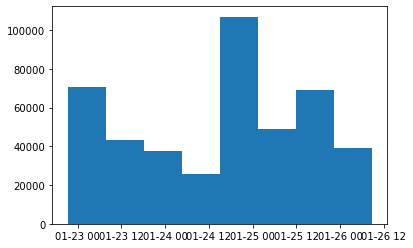

In [35]:
hist_plot = plt.hist(times, 8)

In [46]:
str((1- len(np.unique(df['Text'].dropna()))/len(df['Text']))*100) + '%'

'82.44570574040718%'

77475

In [42]:
d = {}
for string in df['Text'].dropna():
    d[type(string)] = 1
d

{str: 1}